In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
data = pd.read_csv('data/ramen-ratings.csv')

## Display basic information

In [3]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
data.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [5]:
data['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [6]:
# Convert Stars to numeric (handle 'Unrated' values)
data['Stars_numeric'] = pd.to_numeric(data['Stars'], errors='coerce')

In [7]:
# Check how many ratings are missing
print(f"\nTotal reviews: {len(data)}")
print(f"Rated reviews: {data['Stars_numeric'].notna().sum()}")
print(f"Unrated reviews: {data['Stars_numeric'].isna().sum()}")


Total reviews: 2580
Rated reviews: 2577
Unrated reviews: 3


In [8]:
# Check Top Ten column
print(f"\nTop Ten entries (non-empty): {data['Top Ten'].notna().sum()}")
print("\nSample of Top Ten values:")
print(data[data['Top Ten'].notna()]['Top Ten'].head(10))


Top Ten entries (non-empty): 41

Sample of Top Ten values:
616     2016 #10
633      2016 #1
655      2016 #8
673      2016 #5
752      2016 #9
891      2016 #7
942     2015 #10
963      2015 #7
995      2015 #4
1059     2015 #9
Name: Top Ten, dtype: object


In [9]:
# Create a subset with only rated reviews
data_rated = data[data['Stars_numeric'].notna()].copy()
data_rated

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_numeric
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,3.75
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,3.50
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,1.00
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,2.00
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,2.00


## EDA

In [10]:
data_rated['Stars_numeric'].describe()

count    2577.000000
mean        3.654676
std         1.015331
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars_numeric, dtype: float64

### Top 10 Countries by Number of Reviews

In [11]:
country_counts = data['Country'].value_counts().head(10)
country_counts

Country
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Name: count, dtype: int64

### Distribution by Style

In [12]:
style_counts = data['Style'].value_counts()
style_counts

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

### Top 10 Brands by Number of Reviews

In [13]:
brand_counts = data['Brand'].value_counts().head(10)
brand_counts

Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Lucky Me!         34
Name: count, dtype: int64

### Average Rating by Country (top 10 countries)

In [27]:
top_countries = data_rated['Country'].value_counts().head(10).index
country_ratings = data_rated[data_rated['Country'].isin(top_countries)].groupby('Country')['Stars_numeric'].agg(['mean', 'count']).sort_values('mean', ascending=False)
country_ratings

,mean,count
Country,,
Malaysia,4.154194,155
Singapore,4.126147,109
Indonesia,4.067460,126
Japan,3.981605,352
Hong Kong,3.801825,137
South Korea,3.790554,307
Taiwan,3.665402,224
USA,3.457043,323
China,3.421893,169


### Average Rating by Style

In [37]:
style_ratings = data_rated.groupby('Style')['Stars_numeric'].agg(['mean', 'count']).sort_values('mean', ascending=False)
style_ratings

,mean,count
Style,,
Bar,5.000000,1
Box,4.291667,6
Pack,3.700458,1528
Bowl,3.670686,481
Tray,3.545139,108
Can,3.500000,1
Cup,3.498500,450


## Visualizations

C:\Users\Caleb\AppData\Local\Temp\ipykernel_6732\1803649205.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_trends = data_rated.groupby('Review_Range')['Stars_numeric'].mean()


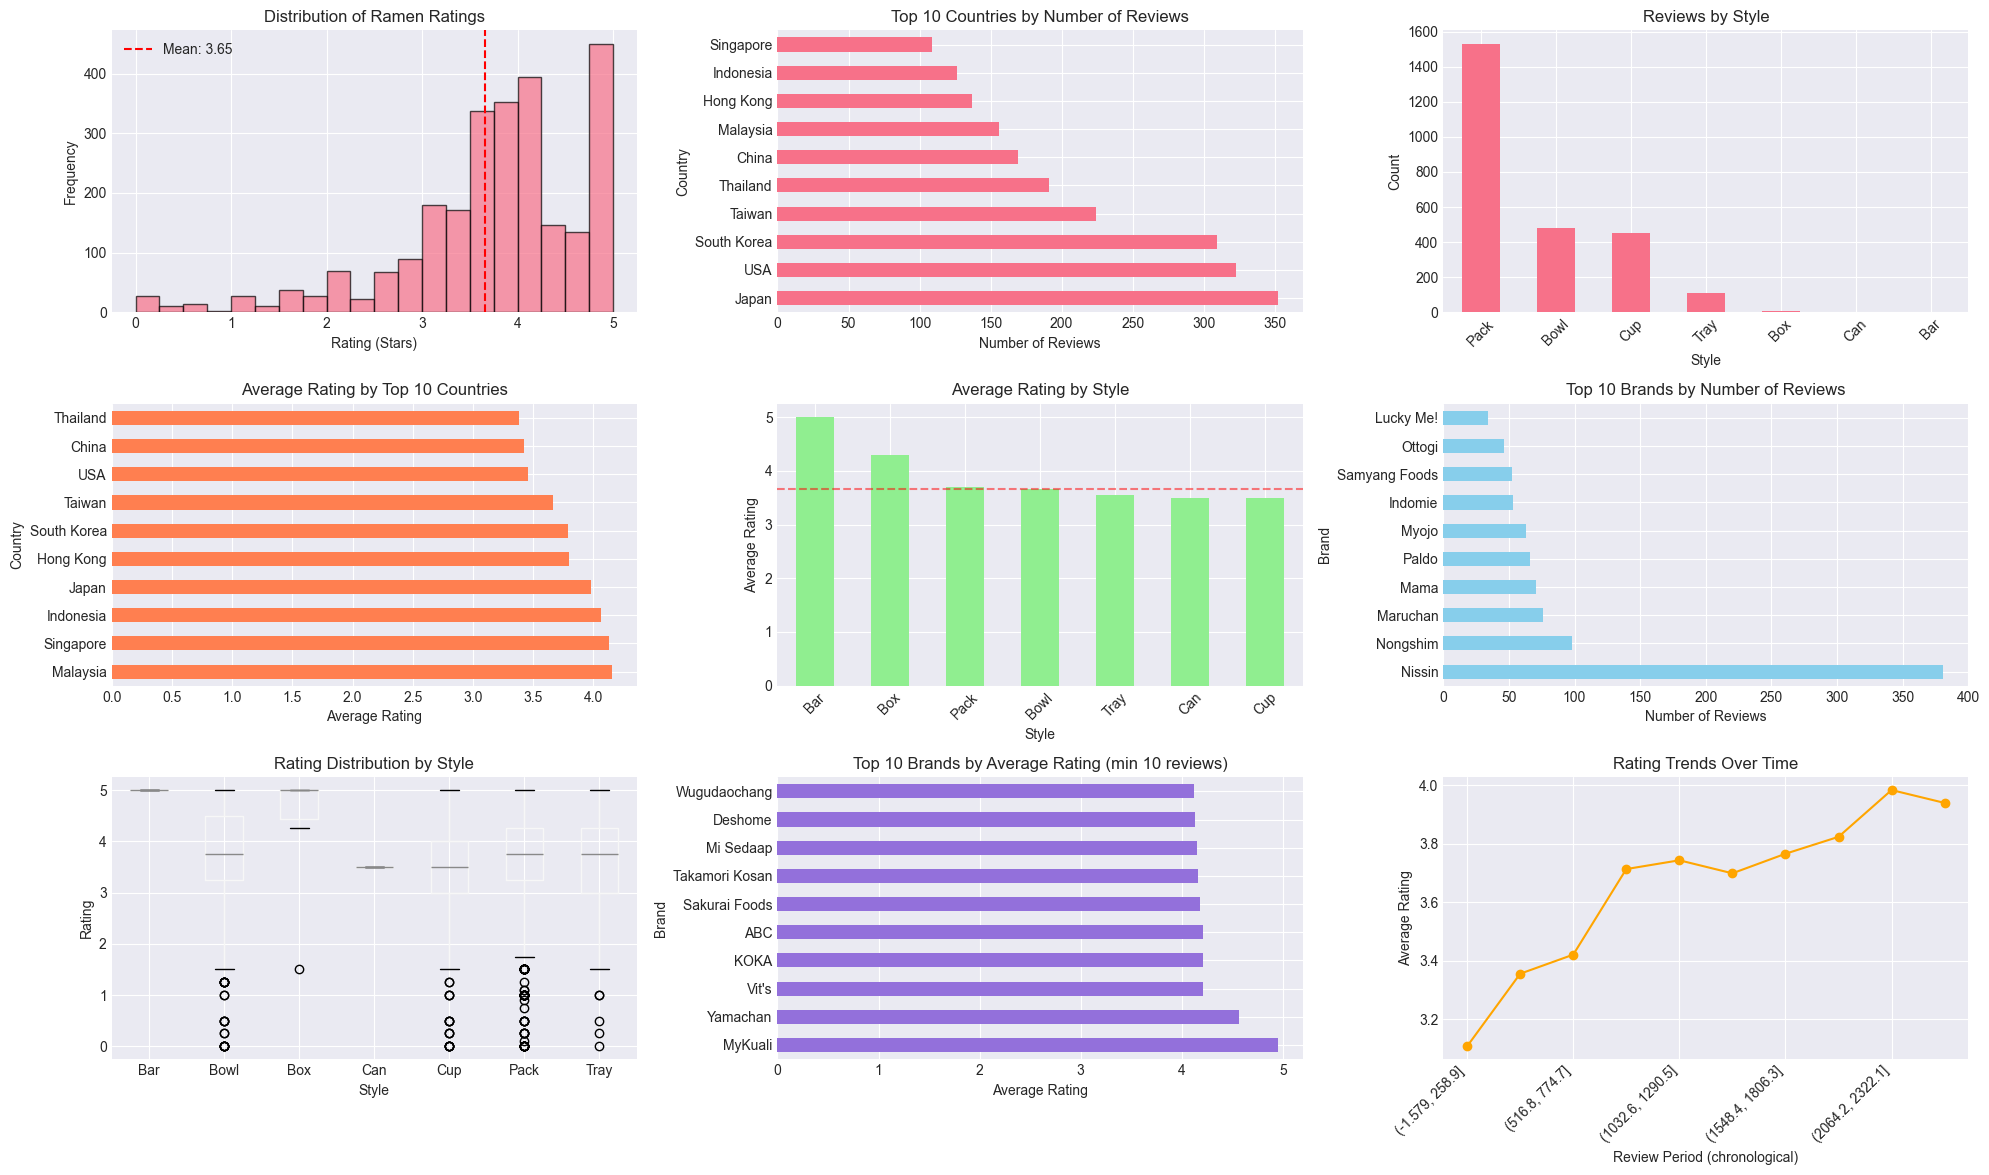

In [39]:
# Set up the plotting area
fig = plt.figure(figsize=(20, 12))

# 1. Rating Distribution
plt.subplot(3, 3, 1)
plt.hist(data_rated['Stars_numeric'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.title('Distribution of Ramen Ratings')
plt.axvline(data_rated['Stars_numeric'].mean(), color='red', linestyle='--', label=f'Mean: {data_rated["Stars_numeric"].mean():.2f}')
plt.legend()

# 2. Top 10 Countries by Count
plt.subplot(3, 3, 2)
country_counts.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.title('Top 10 Countries by Number of Reviews')
plt.tight_layout()

# 3. Reviews by Style
plt.subplot(3, 3, 3)
style_counts.plot(kind='bar')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Reviews by Style')
plt.xticks(rotation=45)

# 4. Average Rating by Top Countries
plt.subplot(3, 3, 4)
country_ratings_plot = data_rated[data_rated['Country'].isin(top_countries)].groupby('Country')['Stars_numeric'].mean().sort_values(ascending=False)
country_ratings_plot.plot(kind='barh', color='coral')
plt.xlabel('Average Rating')
plt.title('Average Rating by Top 10 Countries')

# 5. Average Rating by Style
plt.subplot(3, 3, 5)
style_ratings['mean'].plot(kind='bar', color='lightgreen')
plt.xlabel('Style')
plt.ylabel('Average Rating')
plt.title('Average Rating by Style')
plt.xticks(rotation=45)
plt.axhline(data_rated['Stars_numeric'].mean(), color='red', linestyle='--', alpha=0.5)

# 6. Top 10 Brands by Count
plt.subplot(3, 3, 6)
brand_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Reviews')
plt.title('Top 10 Brands by Number of Reviews')

# 7. Rating Distribution Box Plot by Style
plt.subplot(3, 3, 7)
data_rated.boxplot(column='Stars_numeric', by='Style', ax=plt.gca())
plt.xlabel('Style')
plt.ylabel('Rating')
plt.title('Rating Distribution by Style')
plt.suptitle('')

# 8. Top Brands Average Rating (with min 10 reviews)
plt.subplot(3, 3, 8)
brand_stats = data_rated.groupby('Brand')['Stars_numeric'].agg(['mean', 'count'])
top_brands_rating = brand_stats[brand_stats['count'] >= 10].sort_values('mean', ascending=False).head(10)
top_brands_rating['mean'].plot(kind='barh', color='mediumpurple')
plt.xlabel('Average Rating')
plt.title('Top 10 Brands by Average Rating (min 10 reviews)')

# 9. Reviews Over Time (using Review # as proxy)
plt.subplot(3, 3, 9)
# Group by ranges of Review numbers to see trends
data_rated['Review_Range'] = pd.cut(data_rated['Review #'], bins=10)
time_trends = data_rated.groupby('Review_Range')['Stars_numeric'].mean()
time_trends.plot(kind='line', marker='o', color='orange')
plt.xlabel('Review Period (chronological)')
plt.ylabel('Average Rating')
plt.title('Rating Trends Over Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('ramen_eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

#### Top 10 Countries by Number of Reviews
🇯🇵 Japan, 🇺🇸 USA, 🇰🇷 South Korea, 🇹🇼 Taiwan, and 🇹🇭 Thailand dominate the ramen review scene.
This suggests a global ramen market heavily led by East Asian producers but with strong participation from the U.S.

#### Reviews by Style
The “Pack” style is by far the most common, followed by Cup and Bowl.
This shows instant ramen in packet form remains the most reviewed and consumed type.

#### Average Rating by Country
The top countries by average rating include Malaysia, Singapore, Indonesia, Japan, and Hong Kong.
Interestingly, Malaysia scores very high — often associated with premium instant noodle brands.

#### Top 10 Brands by Number of Reviews
Nissin, Nongshim, and Maruchan dominate in total review volume.
These are global leaders with a wide market footprint, even if not always the highest rated.

#### Rating Trends Over Time
Average ratings have increased gradually over time, peaking near 4.0 in recent years.
This could indicate improving quality or evolving consumer preferences toward better ramen.

## Top 5 countries with the best brand

In [16]:
brand_stats = (
    data_rated.groupby(['Brand', 'Country'], as_index=False)
      .agg(avg_rating=('Stars_numeric', 'mean'),
           review_count=('Stars_numeric', 'count'))
)

# Filter brands with at least 10 reviews
brand_stats_filtered = brand_stats[brand_stats['review_count'] >= 10]

# Find top-rated brand
top_brand = brand_stats_filtered.sort_values(by='avg_rating', ascending=False).head(5)

In [17]:
top_brand

,Brand,Country,avg_rating,review_count
207,MyKuali,Malaysia,4.940476,21
414,Yamachan,USA,4.568182,11
379,Uni-President,Taiwan,4.325000,10
229,Nissin,Japan,4.259910,111
398,Vit's,Malaysia,4.211538,13


Malaysia has the best overall brand (“MyKuali”), with an average rating close to 5.0